In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

#### Load the data. Both Vibrant and CheckV summary data.

In [2]:
vibrant = pd.read_csv('vibrant.csv')

In [7]:
vibrant

,contig,type,quality,lenght,sample,condition,order,family,species
0,C102-NODE_7018_length_3437_cov_2.856594,lytic,low quality draft,3437,C102,Control,NaN,NaN,NaN
1,C102-NODE_5814_length_4323_cov_5.353561,lytic,low quality draft,4323,C102,Control,NaN,NaN,NaN
2,C102-NODE_7216_length_3330_cov_3.552977,lytic,low quality draft,3330,C102,Control,NaN,NaN,NaN
3,C102-NODE_4698_length_5699_cov_7.655209,lytic,low quality draft,5699,C102,Control,NaN,NaN,NaN
4,C102-NODE_2944_length_11058_cov_323.208765,lytic,low quality draft,11058,C102,Control,Caudovirales,Podoviridae,Salmonella virus astrithr
...,...,...,...,...,...,...,...,...,...
111094,P99-NODE_380_length_58792_cov_176.103308,lysogenic,complete circular,58792,P99,Parkinson,Caudovirales,NaN,NaN
111095,P99-NODE_494_length_49870_cov_11.307678,lytic,complete circular,49870,P99,Parkinson,Caudovirales,Myoviridae,Acinetobacter virus 133
111096,P99-NODE_2176_length_17216_cov_264.998835,lytic,complete circular,17216,P99,Parkinson,NaN,NaN,NaN
111097,P99-NODE_19361_length_2590_cov_3.353057,lytic,complete circular,2590,P99,Parkinson,NaN,NaN,NaN


In [9]:
checkv = pd.read_csv('checkv_all.csv')

In [10]:
checkv

,contig,contig_length,provirus,proviral_length,gene_count,viral_genes,host_genes,checkv_quality,miuvig_quality,completeness,completeness_method,contamination,kmer_freq,warnings
0,C102-NODE_7018_length_3437_cov_2.856594,3437,No,NaN,8,1,0,Low-quality,Genome-fragment,11.78,HMM-based (lower-bound),0.0,1.0,NaN
1,C102-NODE_5814_length_4323_cov_5.353561,4323,No,NaN,8,1,0,Low-quality,Genome-fragment,11.89,AAI-based (high-confidence),0.0,1.0,NaN
2,C102-NODE_7216_length_3330_cov_3.552977,3330,No,NaN,6,3,0,Low-quality,Genome-fragment,8.98,AAI-based (medium-confidence),0.0,1.0,NaN
3,C102-NODE_4698_length_5699_cov_7.655209,5699,No,NaN,6,0,0,Not-determined,Genome-fragment,NaN,NaN,0.0,1.0,no viral genes detected
4,C102-NODE_2944_length_11058_cov_323.208765,11058,No,NaN,13,5,0,High-quality,High-quality,96.47,AAI-based (medium-confidence),0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111094,P9-NODE_14348_length_1764_cov_2.424810,1764,No,NaN,5,1,0,Low-quality,Genome-fragment,3.53,AAI-based (high-confidence),0.0,1.0,NaN
111095,P9-NODE_402_length_41648_cov_16.260645,41648,No,NaN,59,19,0,Medium-quality,Genome-fragment,85.08,AAI-based (high-confidence),0.0,1.0,NaN
111096,P9-NODE_13695_length_1846_cov_3.284757,1846,No,NaN,4,3,0,Low-quality,Genome-fragment,3.73,AAI-based (medium-confidence),0.0,1.0,NaN
111097,P9-NODE_11484_length_2206_cov_2.832171,2206,No,NaN,7,0,0,Low-quality,Genome-fragment,3.63,AAI-based (high-confidence),0.0,1.0,no viral genes detected


#### Merge two datasets.

In [11]:
merged = vibrant.merge(checkv, on='contig', how='inner')

In [12]:
merged

,contig,type,quality,lenght,sample,condition,order,family,species,contig_length,...,gene_count,viral_genes,host_genes,checkv_quality,miuvig_quality,completeness,completeness_method,contamination,kmer_freq,warnings
0,C102-NODE_7018_length_3437_cov_2.856594,lytic,low quality draft,3437,C102,Control,NaN,NaN,NaN,3437,...,8,1,0,Low-quality,Genome-fragment,11.78,HMM-based (lower-bound),0.0,1.00,NaN
1,C102-NODE_5814_length_4323_cov_5.353561,lytic,low quality draft,4323,C102,Control,NaN,NaN,NaN,4323,...,8,1,0,Low-quality,Genome-fragment,11.89,AAI-based (high-confidence),0.0,1.00,NaN
2,C102-NODE_7216_length_3330_cov_3.552977,lytic,low quality draft,3330,C102,Control,NaN,NaN,NaN,3330,...,6,3,0,Low-quality,Genome-fragment,8.98,AAI-based (medium-confidence),0.0,1.00,NaN
3,C102-NODE_4698_length_5699_cov_7.655209,lytic,low quality draft,5699,C102,Control,NaN,NaN,NaN,5699,...,6,0,0,Not-determined,Genome-fragment,NaN,NaN,0.0,1.00,no viral genes detected
4,C102-NODE_2944_length_11058_cov_323.208765,lytic,low quality draft,11058,C102,Control,Caudovirales,Podoviridae,Salmonella virus astrithr,11058,...,13,5,0,High-quality,High-quality,96.47,AAI-based (medium-confidence),0.0,1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111094,P99-NODE_380_length_58792_cov_176.103308,lysogenic,complete circular,58792,P99,Parkinson,Caudovirales,NaN,NaN,58792,...,104,25,0,Complete,High-quality,100.00,DTR (high-confidence),0.0,1.00,NaN
111095,P99-NODE_494_length_49870_cov_11.307678,lytic,complete circular,49870,P99,Parkinson,Caudovirales,Myoviridae,Acinetobacter virus 133,49870,...,68,15,1,Complete,High-quality,100.00,DTR (high-confidence),0.0,1.00,NaN
111096,P99-NODE_2176_length_17216_cov_264.998835,lytic,complete circular,17216,P99,Parkinson,NaN,NaN,NaN,17216,...,17,4,0,Low-quality,Genome-fragment,19.69,AAI-based (high-confidence),0.0,1.00,low-confidence DTR
111097,P99-NODE_19361_length_2590_cov_3.353057,lytic,complete circular,2590,P99,Parkinson,NaN,NaN,NaN,2590,...,4,0,0,Not-determined,Genome-fragment,NaN,NaN,0.0,1.01,no viral genes detected


In [104]:
# save the merged dataframe
merged.to_csv('vibrant_checkv.csv', index=False)

#### Create count plots for quality assesments for both Vibrant and CheckV

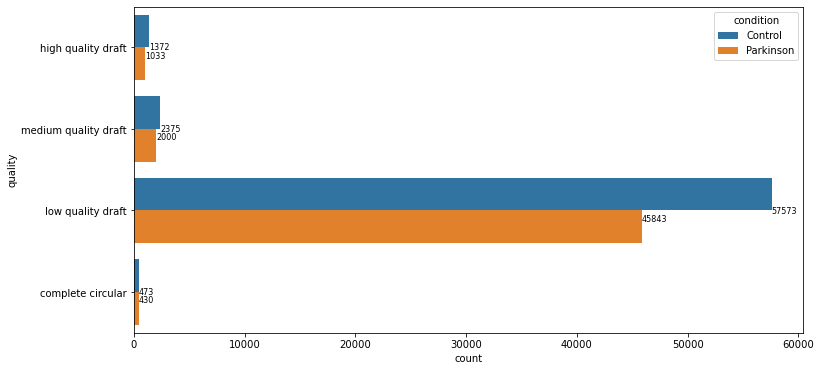

In [91]:
# Create the countplot for Vibrant quality
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=merged, y='quality', hue='condition',
              order=['high quality draft', 'medium quality draft', 'low quality draft', 'complete circular'],
              dodge=True,ax=ax)

# Add the text annotations with some distance from the bars
for i in range(4):
    total = merged[merged['quality'] == ['high quality draft', 'medium quality draft', 'low quality draft', 'complete circular'][i]]['condition'].value_counts()
    for j, count in enumerate(total):
        plt.text(count + 0.1, i + j/10, str(count), ha='left', va='center', fontsize=8)

plt.show()

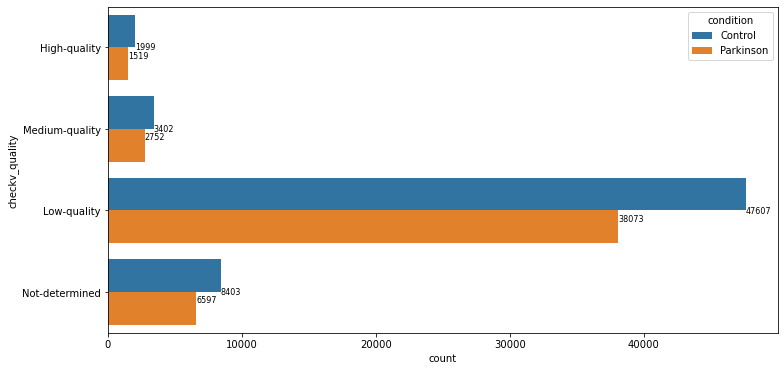

In [92]:
# Create the countplot for CheckV quality
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=merged, y='checkv_quality', hue='condition',
              order=['High-quality', 'Medium-quality', 'Low-quality', 'Not-determined'],
              dodge=True,ax=ax)

# Add the text annotations with some distance from the bars
for i in range(4):
    total = merged[merged['checkv_quality'] == ['High-quality', 'Medium-quality', 'Low-quality', 'Not-determined'][i]]['condition'].value_counts()
    for j, count in enumerate(total):
        plt.text(count + 0.1, i + j/10, str(count), ha='left', va='center', fontsize=8)

plt.show()

#### Create countplot for type (lytic, lysogenic, pro) based on Vibrant criteria and CheckV criteria

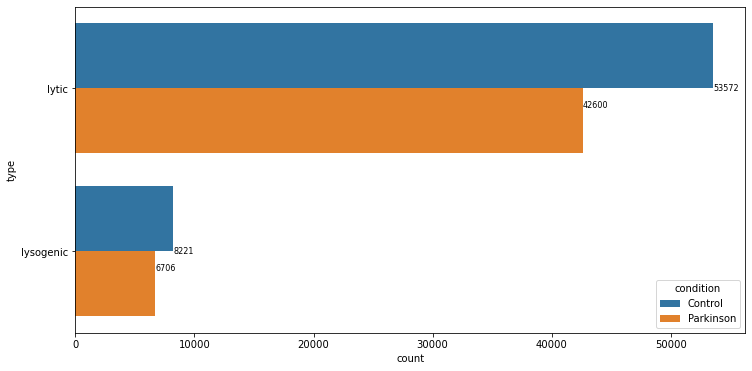

In [95]:
# Create the countplot for type based on Vibrant criteria
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=merged, y='type', hue='condition',
              order=['lytic', 'lysogenic'],
              dodge=True,ax=ax)
# Add the text annotations with some distance from the bars
for i in range(2):
    total = merged[merged['type'] == ['lytic', 'lysogenic'][i]]['condition'].value_counts()
    for j, count in enumerate(total):
        plt.text(count + 0.1, i + j/10, str(count), ha='left', va='center', fontsize=8)

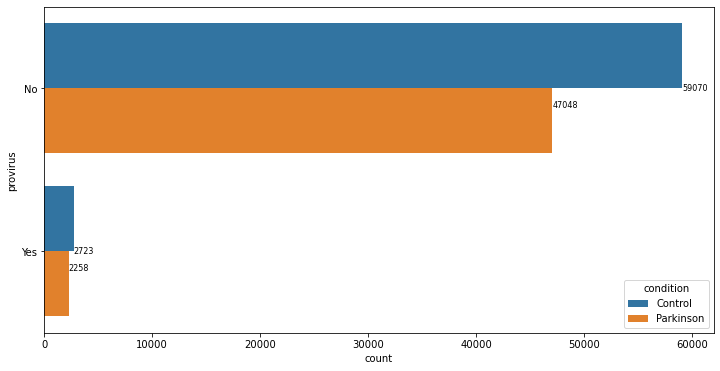

In [98]:
# Create the countplot for tprovirus type based on CheckV criteria
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=merged, y='provirus', hue='condition',
              order=['No', 'Yes'],
              dodge=True,ax=ax)
# Add the text annotations with some distance from the bars
for i in range(2):
    total = merged[merged['provirus'] == ['No', 'Yes'][i]]['condition'].value_counts()
    for j, count in enumerate(total):
        plt.text(count + 0.1, i + j/10, str(count), ha='left', va='center', fontsize=8)



#### Plot for completeness

<AxesSubplot:xlabel='condition', ylabel='completeness'>

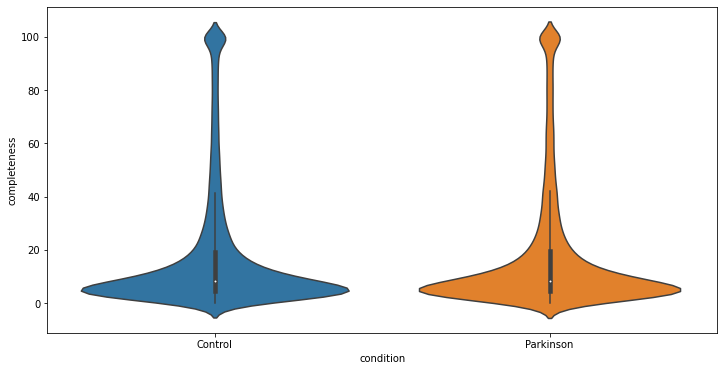

In [103]:
# Create the violinplot for completeness
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=merged, y='completeness', x='condition')

#### Remove the host genome from the lenght column using CheckV data

In [106]:
# Before checking the lenght of the phages, we need to remove the host genome from the lenght column using CheckV data
merged['host_removed_lenght'] = merged['proviral_length'].fillna(merged['lenght'])


<AxesSubplot:xlabel='type', ylabel='host_removed_lenght'>

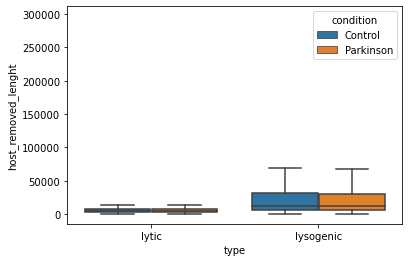

In [110]:
sns.boxplot(data=merged, x='type', y='host_removed_lenght',hue='condition',fliersize=0)
#sns.swarmplot(data=merged, y='type', x='lenght', color='black')

#### Calculate average lenght per sample for simpler visualization

In [112]:
# lytic phages lenght average per contition
merged[merged['type'] == 'lytic'].groupby('condition')['host_removed_lenght'].mean()

condition
Control      7126.560927
Parkinson    7138.920892
Name: host_removed_lenght, dtype: float64

In [113]:
# lysogenic phages lenght average per contition
merged[merged['type'] == 'lysogenic'].groupby('condition')['host_removed_lenght'].mean()

condition
Control      20116.426104
Parkinson    19628.417089
Name: host_removed_lenght, dtype: float64

In [117]:
# create average lenght for lytic and lysogenic phages per sample using sample column
avg_len_lytic_phages = merged[merged['type'] == 'lytic'].groupby('sample')['host_removed_lenght'].mean()
avg_len_lysogenic_phages = merged[merged['type'] == 'lysogenic'].groupby('sample')['host_removed_lenght'].mean()

In [132]:
average_length_per_sample = pd.concat([avg_len_lytic_phages, avg_len_lysogenic_phages], axis=1)
average_length_per_sample.reset_index(inplace=True)
average_length_per_sample.columns = ['sample', 'lytic', 'lysogenic']
#melt the dataframe so each sample have a row for each type
average_length_per_sample = average_length_per_sample.melt(id_vars='sample', var_name='type', value_name='average_length')
average_length_per_sample

,sample,type,average_length
0,C1,lytic,6841.423365
1,C102,lytic,6931.446108
2,C103,lytic,6232.432609
3,C104,lytic,6663.356373
4,C105,lytic,6820.527183
...,...,...,...
267,P88,lysogenic,18479.153846
268,P9,lysogenic,19482.531250
269,P94,lysogenic,20317.272727
270,P95II,lysogenic,23284.681319


In [133]:
# Add condition column to the average_length_per_sample dataframe based on the sample column, if sample starts with 'C' then it is control, otherwise it is treated
average_length_per_sample['condition'] = average_length_per_sample['sample'].apply(lambda x: 'Control' if x.startswith('C') else 'Parkinson')
average_length_per_sample

,sample,type,average_length,condition
0,C1,lytic,6841.423365,Control
1,C102,lytic,6931.446108,Control
2,C103,lytic,6232.432609,Control
3,C104,lytic,6663.356373,Control
4,C105,lytic,6820.527183,Control
...,...,...,...,...
267,P88,lysogenic,18479.153846,Parkinson
268,P9,lysogenic,19482.531250,Parkinson
269,P94,lysogenic,20317.272727,Parkinson
270,P95II,lysogenic,23284.681319,Parkinson


<AxesSubplot:xlabel='type', ylabel='average_length'>

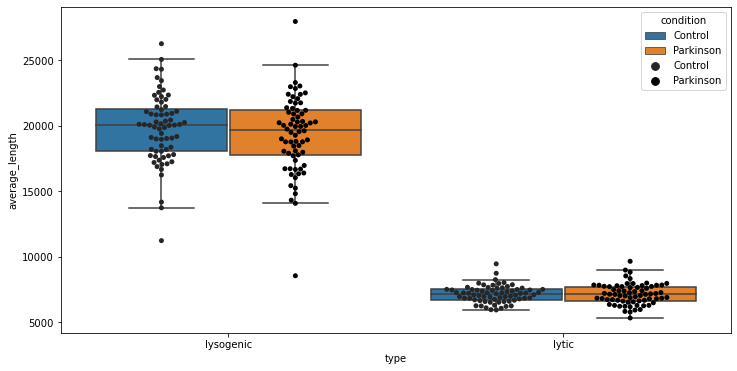

In [165]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=average_length_per_sample, x='type', y='average_length', hue='condition', fliersize=0, order=['lysogenic','lytic'])
sns.swarmplot(data=average_length_per_sample, x='type', y='average_length',
              hue='condition', dodge=True, order=['lysogenic','lytic'],color='black', size=5)

#### Run length comparison between Control and Parkinson phages

#### lytic phages

In [155]:
# To run length comparison between Control and Parkinson for phages (lytic and lysogenic separately), let's get the x and y values
# Start with lytic phages
# x will be the lenght of the lytic phages for control and y will be the lytic lenght of the phages for Parkinson
# we will use host_removed_lenght and type columns from merged dataframe.
x = merged[(merged['type'] == 'lytic') & (merged['condition'] == 'Control')]['host_removed_lenght']
y = merged[(merged['type'] == 'lytic') & (merged['condition'] == 'Parkinson')]['host_removed_lenght']

# Run the Mann-Whitney U test
mannwhitneyu(x, y, alternative='two-sided')
# MannwhitneyuResult(statistic=1149021753.5, pvalue=0.06343418280221434)
# Not significant

MannwhitneyuResult(statistic=1149021753.5, pvalue=0.06343418280221434)

#### lysogenic phages

In [156]:
# Now with lysogenic phages
# x will be the lenght of the lysogenic phages for control and y will be the lysogenic lenght of the phages for Parkinson
# we will use host_removed_lenght and type columns from merged dataframe.
x = merged[(merged['type'] == 'lysogenic') & (merged['condition'] == 'Control')]['host_removed_lenght']
y = merged[(merged['type'] == 'lysogenic') & (merged['condition'] == 'Parkinson')]['host_removed_lenght']

# Run the Mann-Whitney U test
mannwhitneyu(x, y, alternative='two-sided')
#MannwhitneyuResult(statistic=27763130.0, pvalue=0.449341716772771)
# Not significant

MannwhitneyuResult(statistic=27763130.0, pvalue=0.449341716772771)